In [30]:
# Loading the necessary libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [31]:
# Loading the dataset
data = pd.read_excel('data/UAE_Population_data.xlsx')

In [32]:
# Check basic structure of the data
print(data.head())
print(data.info())

          location_name  age_group_name   sex  year  value
0  United Arab Emirates  Early Neonatal  Male  1950     39
1  United Arab Emirates  Early Neonatal  Male  1951     35
2  United Arab Emirates  Early Neonatal  Male  1952     36
3  United Arab Emirates  Early Neonatal  Male  1953     37
4  United Arab Emirates  Early Neonatal  Male  1954     37
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5256 entries, 0 to 5255
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   location_name   5256 non-null   object
 1   age_group_name  5256 non-null   object
 2   sex             5256 non-null   object
 3   year            5256 non-null   int64 
 4   value           5256 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 205.4+ KB
None


In [33]:
# Preprocessing the Data 
# preprocessing the data for time series forecasting or regression modeling.
########################

# Convert 'year' to datetime 
data['year'] = pd.to_datetime(data['year'], format='%Y')

# Drop missing values 
data.dropna(inplace=True)

# For time series, we'll group the data by year and sum population
population_year = data.groupby('year')['value'].sum().reset_index()

# Check the result
print(population_year.head())

        year   value
0 1950-01-01  293771
1 1951-01-01  304186
2 1952-01-01  315034
3 1953-01-01  326346
4 1954-01-01  338134


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Temp\ipykernel_7964\3252267866.py:17: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(pd.date_range(start=population_year.index[-1], periods=11, freq='Y')[1:], forecast, label='Forecast', color='red')


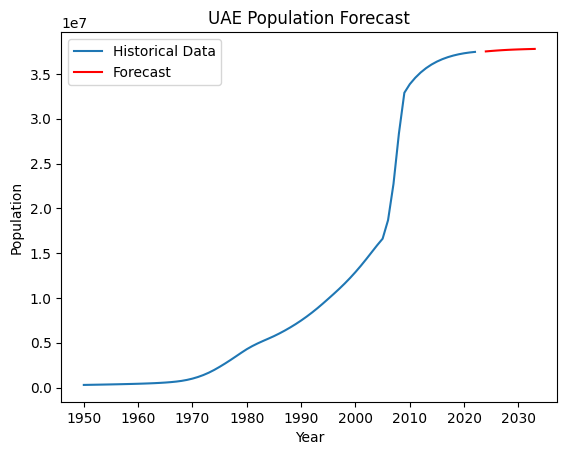

2023-01-01    3.751570e+07
2024-01-01    3.756649e+07
2025-01-01    3.761318e+07
2026-01-01    3.765395e+07
2027-01-01    3.768802e+07
2028-01-01    3.771618e+07
2029-01-01    3.773987e+07
2030-01-01    3.776032e+07
2031-01-01    3.777814e+07
2032-01-01    3.779357e+07
Freq: YS-JAN, Name: predicted_mean, dtype: float64


In [34]:
#Time Series Forecasting (ARIMA)
# to predict future population growth based on historical data
#####################################

# Set the 'year' column as the index
population_year.set_index('year', inplace=True)

# ARIMA Model for Time Series Forecasting
model = ARIMA(population_year['value'], order=(5, 1, 0))  # Adjust (p, d, q) parameters based on model performance
model_fit = model.fit()

# Make predictions
forecast = model_fit.forecast(steps=10)  # Forecast the next 10 years

# Plotting the forecast
plt.plot(population_year.index, population_year['value'], label='Historical Data')
plt.plot(pd.date_range(start=population_year.index[-1], periods=11, freq='Y')[1:], forecast, label='Forecast', color='red')
plt.title('UAE Population Forecast')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.show()

# Print the forecasted values
print(forecast)

In [35]:
# Ensure that the 'year' column is treated numerically
data['year'] = data['year'].dt.year

# Convert categorical columns to dummy/one-hot encoding
X = pd.get_dummies(data[['year', 'sex', 'age_group_name']], drop_first=True)

# Check the data types of the feature matrix
print(X.dtypes)

# Verify the target variable is numeric
y = data['value']
print(y.dtypes)

# Regression Modeling
# to predict population based on year, gender, and age group.
###############################

# Prepare data for regression modeling
#X = data[['year', 'sex', 'age_group_name']]  # Features (year, sex, age group)
#X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical variables
#y = data['value']  # Target (population count)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

year                                         int32
sex_Female                                    bool
sex_Male                                      bool
age_group_name_10 to 14                       bool
age_group_name_15 to 19                       bool
age_group_name_20 to 24                       bool
age_group_name_25 to 29                       bool
age_group_name_30 to 34                       bool
age_group_name_35 to 39                       bool
age_group_name_40 to 44                       bool
age_group_name_45 to 49                       bool
age_group_name_5 to 9                         bool
age_group_name_50 to 54                       bool
age_group_name_55 to 59                       bool
age_group_name_60 to 64                       bool
age_group_name_65 to 69                       bool
age_group_name_70 to 74                       bool
age_group_name_75 to 79                       bool
age_group_name_80 to 84                       bool
age_group_name_85 to 89        

In [36]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
lr_rmse = mean_squared_error(y_test, y_pred_lr, squared=False)
lr_r2 = r2_score(y_test, y_pred_lr)

print(f'Linear Regression RMSE: {lr_rmse}')
print(f'Linear Regression R-squared: {lr_r2}')

Linear Regression RMSE: 535845.8998957714
Linear Regression R-squared: 0.3919476673676999


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [37]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f'Random Forest RMSE: {rf_rmse}')
print(f'Random Forest R-squared: {rf_r2}')

Random Forest RMSE: 35734.773516916044
Random Forest R-squared: 0.9972957726380889


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [38]:
# Model Evaluation and Insights
# comparing the results of the models

# Compare RMSE and R-squared values for both models
print(f'Linear Regression RMSE: {lr_rmse}, R2: {lr_r2}')
print(f'Random Forest RMSE: {rf_rmse}, R2: {rf_r2}')

Linear Regression RMSE: 535845.8998957714, R2: 0.3919476673676999
Random Forest RMSE: 35734.773516916044, R2: 0.9972957726380889


In [39]:
# Analyze the importance of different features to understand which factors contribute the most to the population predictions.
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                                      Feature  Importance
0                                        year    0.486874
22  age_group_name_All Ages (Total Per Annum)    0.302978
1                                  sex_Female    0.139628
2                                    sex_Male    0.020387
8                     age_group_name_35 to 39    0.011344
7                     age_group_name_30 to 34    0.011153
6                     age_group_name_25 to 29    0.009152
9                     age_group_name_40 to 44    0.008328
5                     age_group_name_20 to 24    0.002662
10                    age_group_name_45 to 49    0.002318
11                      age_group_name_5 to 9    0.001201
3                     age_group_name_10 to 14    0.000874
12                    age_group_name_50 to 54    0.000799
4                     age_group_name_15 to 19    0.000774
25               age_group_name_Post Neonatal    0.000290
13                    age_group_name_55 to 59    0.000266
14            

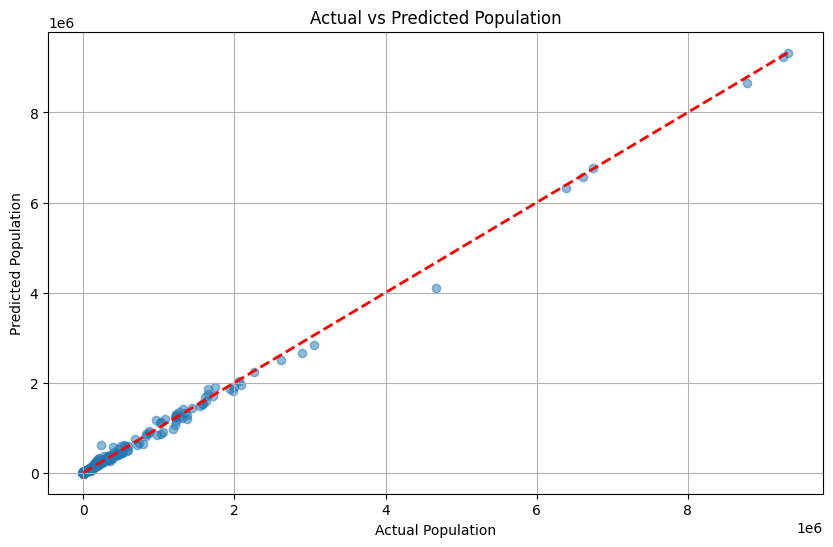

In [40]:
# Plotting the predicted values vs the actual values to visually inspect the model’s performance.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Population')
plt.ylabel('Predicted Population')
plt.title('Actual vs Predicted Population')
plt.grid(True)
plt.show()